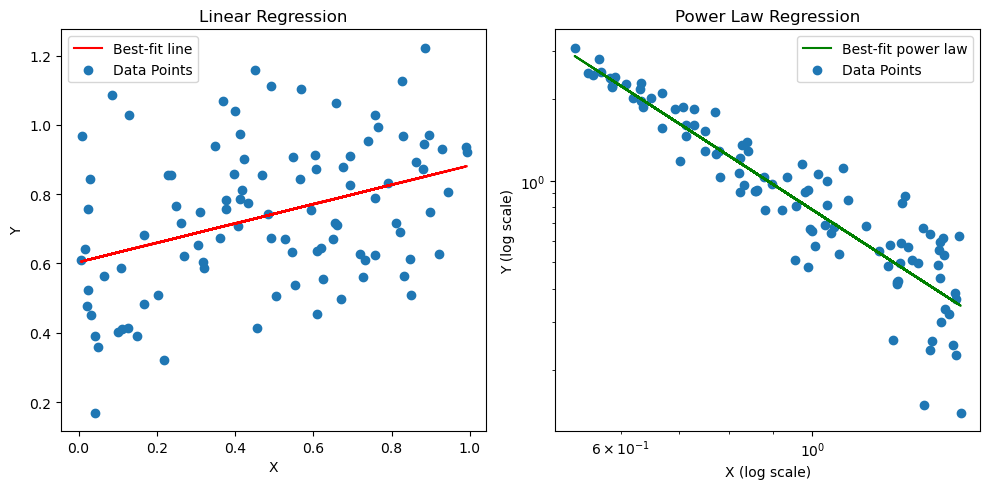

Linear Regression:
β0 = 0.603792035722659, β1 = 0.27886961279536976
R-squared = 0.14169874477258482

Power Law Regression:
β0 = 0.7806481426900127, β1 = -2.0621008861683605
R-squared = -2.4231671877531533


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def load_linear_data():
    
    x,y = np.loadtxt("linear_data.dat",unpack=True)

    return (x,y)


def load_powerlaw_data():
    
    x,y = np.loadtxt("powerlaw_data.dat",unpack=True)

    return (x,y)


def linear_regression(x_array,y_array):

    """
    Computes the least-squares maximization of the input x and y data
    
    PARAMETERS:
    input:
        x_array -- x values from file;
        y_array -- y values from file;

    RETURNS:
        beta_0, beta_1

        See the assignment sheet for additional details about these
        function parameters.
        
        You are allowed to use any NumPy functions for linear algebra
        (matrix multiplication, inverse, transpose, etc) except the least 
        squares function
    """
    
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    
    beta_1 = np.sum((x_array - x_mean) * (y_array - y_mean)) / np.sum((x_array - x_mean) ** 2)
    beta_0 = y_mean - beta_1 * x_mean

    
    return(beta_0, beta_1)


def r_squared(x_array,y_array,beta_0,beta_1):

    """
    Computes the least-squares maximization of the input x and y data
    
    PARAMETERS:
    input:
        x_array -- x values from file;
        y_array -- y values from file;
        beta_0  -- constant offset from least-squares fit
        beta_1  -- slope from least-squares fit

    RETURNS:
        R^2 statistic
    """
    y_predicted = beta_0 + beta_1 * x_array
    SS_res = np.sum((y_array - y_predicted) ** 2)
    SS_tot = np.sum((y_array - np.mean(y_array)) ** 2)
    R_2 = 1 - (SS_res / SS_tot)
    return R_2
    
    
    return(R_2)



def main():
    x_lin, y_lin = load_linear_data()
    x_pl, y_pl = load_powerlaw_data()

    # Linear regression for linear data
    beta_0_lin, beta_1_lin = linear_regression(x_lin, y_lin)
    r_squared_lin = r_squared(x_lin, y_lin, beta_0_lin, beta_1_lin)

    # Linear regression for power-law data in log-log space
    log_x_pl = np.log(x_pl)
    log_y_pl = np.log(y_pl)
    beta_0_pl_loglog, beta_1_pl_loglog = linear_regression(log_x_pl, log_y_pl)
    beta_0_pl = np.exp(beta_0_pl_loglog)
    beta_1_pl = beta_1_pl_loglog

    # Calculate R-squared for power-law data
    y_predicted_pl = beta_0_pl * (x_pl ** beta_1_pl)
    r_squared_pl = r_squared(y_pl, y_predicted_pl, 0, 0)

    # Plotting
    plt.figure(figsize=(10, 5))

    # Plotting linear data and regression line
    plt.subplot(1, 2, 1)
    plt.scatter(x_lin, y_lin, label='Data Points')
    plt.plot(x_lin, beta_0_lin + beta_1_lin * x_lin, color='red', label='Best-fit line')
    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Plotting power-law data and regression line
    plt.subplot(1, 2, 2)
    plt.scatter(x_pl, y_pl, label='Data Points')
    plt.plot(x_pl, beta_0_pl * (x_pl ** beta_1_pl), color='green', label='Best-fit power law')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Power Law Regression')
    plt.xlabel('X (log scale)')
    plt.ylabel('Y (log scale)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("Linear Regression:")
    print(f"β0 = {beta_0_lin}, β1 = {beta_1_lin}")
    print(f"R-squared = {r_squared_lin}")

    print("\nPower Law Regression:")
    print(f"β0 = {beta_0_pl}, β1 = {beta_1_pl}")
    print(f"R-squared = {r_squared_pl}")

main()  # Don't delete the call to main() by mistake!